# Cytoscape product uniqness exploration

In [25]:
import py4cytoscape as p4c
import pandas as pd
import uuid
from time import sleep
import matplotlib.pyplot as plt

In [26]:
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.1',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [27]:
p4c.set_current_network('ssn.txt_1')

{}

In [12]:
p4c.export_image('images/test.png',all_graphics_details=False,hide_labels=True,zoom=375,overwrite_file=True)

{'file': 'C:\\Users\\terca\\OneDrive\\Dokumenty\\Uni\\Mgr\\2.rocnik\\diplomka\\results\\results\\ssn\\50_filtered_5\\images\\test.png'}

In [15]:
max_color_c=64

In [59]:
p4c.get_table_columns().columns

Index(['SUID', 'shared name', 'name', 'selected', 'characterized',
       'PF01397.24', '0053354', 'PF13243.9', 'type_general', '0048261',
       '0053355', 'PF06330.14', '0046340', '0047573', 'PF13249.9',
       'most_unique_product_count', 'kingdom', '0048806', 'superkingdom',
       'PF00494.22', 'phylum', 'species', '0041184',
       'most_unique_product_name', 'PF19086.3', 'PF03936.19',
       'most_unique_product_count2'],
      dtype='object')

In [60]:
p4c.get_table_columns()['most_unique_product_count2']=numeric_values

In [77]:
df=p4c.get_table_columns()[['SUID', 'most_unique_product_count']]

In [81]:
df['most_unique_product_count'].unique()

array([None, '14.0', '12.0', '2.0', '20.0', '1.0', '10.0', '7.0', '8.0',
       '22.0', '27.0', '4.0', '9.0', '18.0', '33.0', '11.0', '21.0',
       '15.0', '13.0', '5.0', '3.0', '58.0', '24.0', '40.0', '6.0',
       '16.0', '35.0', '64.0', '26.0', '31.0', '37.0', '41.0', '19.0'],
      dtype=object)

In [82]:
df['most_unique_product_count2'] = df['most_unique_product_count'].apply(lambda x: -1 if x==None else float(x))

In [83]:
df['most_unique_product_count2'].unique()

array([-1., 14., 12.,  2., 20.,  1., 10.,  7.,  8., 22., 27.,  4.,  9.,
       18., 33., 11., 21., 15., 13.,  5.,  3., 58., 24., 40.,  6., 16.,
       35., 64., 26., 31., 37., 41., 19.])

In [84]:
p4c.load_table_data(df, data_key_column='SUID',table_key_column='SUID')

'Success: Data loaded in defaultnode table'

In [42]:
current_values = p4c.get_table_columns()['most_unique_product_count'].tolist()

In [45]:
import numpy as np

In [47]:
numeric_values = [np.nan if value == '' else float(value) for value in current_values]

In [87]:
p4c.set_node_color_mapping(**p4c.gen_node_color_map('most_unique_product_count2', p4c.palette_color_brewer_s_Blues()))

style_name not specified, so updating "default" style.


''

# Sequences with interesting products - EDA

In [88]:
import pandas as pd

In [92]:
pd.set_option('display.max_columns', None)

In [90]:
df=pd.read_csv('data_annotation.txt', sep='\t')

In [93]:
df

,id,name,type,type_general,species,kingdom,product_names,product_counts,most_unique_product_name,most_unique_product_count,architecture_pfam,architecture_l_pfam,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,architecture_supfam,architecture_l_supfam,0041184,0053354,0053355,0048261,0048806,0046340,0047573,characterized,superkingdom,phylum
0,A0A023J8Z5,Delta guaiene synthase,sesq,sesq,Aquilaria microcarpa,Plantae,δ-guaiene; germacrene A; α-humulene,"[8, 6, 2]",α-humulene,2.0,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
1,A0A059PYD5,Caryophyllene synthase,mono,mono,Artemisia annua,Plantae,β-phellandrene,[13],β-phellandrene,13.0,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
2,A0A067SEC9,Sesquiterpene synthase GALMADRAFT_104215,sesq,sesq,Galerina marginata,Fungi,β-gurjunene,[1],β-gurjunene,1.0,['PF19086.3'],['PF19086.3'],0.0,0.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
3,A0A075FA51,"(+)-copalyl diphosphate synthase 3, chloroplastic",di-int,di,Marrubium vulgare,Plantae,"5α,9α,10β-labda-8(20),13-dien-15-yl diphosphat...",[16],"5α,9α,10β-labda-8(20),13-dien-15-yl diphosphat...",16.0,"['PF13243.9_partial', 'PF01397.24', 'PF03936.1...","['PF13243.9_partial', 'PF01397.24', 'PF03936.1...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,"['48239', '48576']","['48239', '48576']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
4,A0A075FAK4,Peregrinol diphosphate synthase CPS1,di-int,di,Marrubium vulgare,Plantae,peregrinol diphosphate(3−),[2],peregrinol diphosphate(3−),2.0,"['PF01397.24', 'PF03936.19_partial', 'PF03936....","['PF01397.24', 'PF03936.19_partial', 'PF03936....",0.0,1.0,1.0,0.0,0.0,0.0,0.0,"['48239', '48576']","['48239', '48576']",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Eukaryota,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22417,uniprot_129556,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,Bacteria,Bacillota
22418,uniprot_250698,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,unknown,unknown
22419,uniprot_238555,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,Archaea,Candidatus Bathyarchaeota
22420,uniprot_245342,NaN,NaN,NaN,NaN,Fungi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,Eukaryota,Mucoromycota


In [97]:
char_df = df[df['characterized']==1]

In [100]:
# Filter sequences which have product which is not present in the TPS db more than 3 times
interesting_char_df = char_df[char_df['most_unique_product_count']<3]

There are 288 sequences which produce a product which did not occur in the TPS db more than 3 times

In [101]:
interesting_char_df

,id,name,type,type_general,species,kingdom,product_names,product_counts,most_unique_product_name,most_unique_product_count,architecture_pfam,architecture_l_pfam,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,architecture_supfam,architecture_l_supfam,0041184,0053354,0053355,0048261,0048806,0046340,0047573,characterized,superkingdom,phylum
0,A0A023J8Z5,Delta guaiene synthase,sesq,sesq,Aquilaria microcarpa,Plantae,δ-guaiene; germacrene A; α-humulene,"[8, 6, 2]",α-humulene,2.0,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
2,A0A067SEC9,Sesquiterpene synthase GALMADRAFT_104215,sesq,sesq,Galerina marginata,Fungi,β-gurjunene,[1],β-gurjunene,1.0,['PF19086.3'],['PF19086.3'],0.0,0.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
4,A0A075FAK4,Peregrinol diphosphate synthase CPS1,di-int,di,Marrubium vulgare,Plantae,peregrinol diphosphate(3−),[2],peregrinol diphosphate(3−),2.0,"['PF01397.24', 'PF03936.19_partial', 'PF03936....","['PF01397.24', 'PF03936.19_partial', 'PF03936....",0.0,1.0,1.0,0.0,0.0,0.0,0.0,"['48239', '48576']","['48239', '48576']",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Eukaryota,NaN
5,A0A075FBG7,"9,13-epoxylabda-14-ene synthase",di,di,Marrubium vulgare,Plantae,"9,13(R)-epoxylabd-14-ene; miltiradiene; (13R)-...","[2, 9, 3]","9,13(R)-epoxylabd-14-ene",2.0,"['PF01397.24', 'PF03936.19']","['PF01397.24', 'PF03936.19']",0.0,1.0,1.0,0.0,0.0,1.0,0.0,"['48239', '48576']","['48239', '48576']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
32,A0A0C9VD04,Sesquiterpene synthase M422DRAFT_47084,sesq,sesq,Sphaerobolus stellatus,Fungi,viridiflorene; viridiflorol,"[6, 2]",viridiflorol,2.0,['PF19086.3'],['PF19086.3'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,WDE20679.1,Sesquiterpene synthase,sesq; mono,mixed,Bubarida sp.,Animalia,mixed sesquiterpenes; β-myricene; (E)-β-ocimen...,"[2, 5, 27, 15]",mixed sesquiterpenes,2.0,['PF19086.3'],['PF19086.3'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
1124,WDE20680.1,Sesquiterpene synthase,sesq,sesq,Bubarida sp.,Animalia,mixed sesquiterpenes,[2],mixed sesquiterpenes,2.0,"['PF19086.3_partial', 'PF19086.3']","['PF19086.3_partial', 'PF19086.3']",0.0,0.0,0.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Eukaryota,NaN
1125,WP_089795910.1,NaN,di,di,Chryseobacterium wanjuense,Bacteria,ent-bonnadiene; wanjudiene,"[1, 1]",ent-bonnadiene,1.0,['PF19086.3'],['PF19086.3'],0.0,0.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Bacteria,NaN
1126,WP_092528762.1,Diterpene synthase,di,di,Amycolatopis arida,Bacteria,"(Z)-eunicellane benditerpe-2,6,15-triene; (R)-...","[1, 1]","(Z)-eunicellane benditerpe-2,6,15-triene",1.0,['PF19086.3'],['PF19086.3'],0.0,0.0,1.0,0.0,0.0,1.0,0.0,['48576'],['48576'],0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Bacteria,NaN


There are **244 eukaryotic sequences** (out of 1056 -> 23%) and **43 bacterial sequences** (out of 75 -> 57%)

In [128]:
value_counts_char = char_df['superkingdom'].value_counts()
value_counts_interesting_char = interesting_char_df['superkingdom'].value_counts()
merged_counts = pd.concat([value_counts_char, value_counts_interesting_char], axis=1, keys=['char', 'interesting_char'])
merged_counts['ratio'] = merged_counts['interesting_char'] / merged_counts['char']*100
merged_counts.sort_values(by='ratio', ascending=False)

,char,interesting_char,ratio
superkingdom,,,
Cyanobacteria,1,1,100.000000
Bacteria,75,43,57.333333
Eukaryota,1056,244,23.106061


Most interesting products are by % from diTPS, mixedTPS, sesterTPS, sesqTPS and triTPS.

By total count, most interesting products are from sesqTPS, diTPS, mixedTPD.

In [127]:
value_counts_char = char_df['type_general'].value_counts()
value_counts_interesting_char = interesting_char_df['type_general'].value_counts()
merged_counts = pd.concat([value_counts_char, value_counts_interesting_char], axis=1, keys=['char', 'interesting_char'])
merged_counts['ratio'] = merged_counts['interesting_char'] / merged_counts['char']*100
merged_counts.sort_values(by='ratio', ascending=False)

,char,interesting_char,ratio
type_general,,,
hsqs,2,2.0,100.000000
meroterpenoid,1,1.0,100.000000
sesquar,1,1.0,100.000000
di,171,69.0,40.350877
mixed,86,34.0,39.534884
sester,44,17.0,38.636364
sesq,475,115.0,24.210526
tri,143,29.0,20.279720
tetra,13,2.0,15.384615


In [169]:
def compare_distr_char_intersting_char(superkingdom, col, normalize=False, sort_by_ratio=True):
    value_counts_char = char_df[char_df['superkingdom']==superkingdom][col].value_counts(normalize=normalize)
    value_counts_interesting_char = interesting_char_df[interesting_char_df['superkingdom']==superkingdom][col].value_counts(normalize=normalize)
    merged_counts = pd.concat([value_counts_char, value_counts_interesting_char], axis=1, keys=['char', 'interesting_char'])
    if normalize:
        return merged_counts.sort_values(by='interesting_char', ascending=False)
    merged_counts['ratio'] = merged_counts['interesting_char'] / merged_counts['char']*100
    if sort_by_ratio:
        return merged_counts.sort_values(by='ratio', ascending=False)
    return merged_counts.sort_values(by='interesting_char', ascending=False)

## Eukaryotes

In Eukaryotes:

* 148 sequences are from **Plantae** (out of 799 -> 19%)
* 71 sequences are from **Fungi** (out of 196 -> 36%)
* 8 sequences are from **Animalia** (out of 15 -> 53%)
* 8 sequences are from **Coral** (out of 17 -> 47%)

In [163]:
compare_distr_char_intersting_char('Eukaryota', 'kingdom', normalize=False, sort_by_ratio=True)

,char,interesting_char,ratio
kingdom,,,
Red algae,4,4,100.000000
Animalia,15,8,53.333333
Coral,17,8,47.058824
Fungi,196,71,36.224490
Insecta,8,2,25.000000
Plantae,799,148,18.523154
Amoebozoa,17,3,17.647059


In [162]:
compare_distr_char_intersting_char('Eukaryota', 'type_general', normalize=False, sort_by_ratio=False)

,char,interesting_char,ratio
type_general,,,
sesq,447,100.0,22.371365
di,149,49.0,32.885906
mixed,81,32.0,39.506173
tri,136,27.0,19.852941
mono,186,18.0,9.677419
sester,44,17.0,38.636364
tetra,9,1.0,11.111111
hemi,4,NaN,NaN


### Compare Pfam domains presence

There is no significant difference.

In [175]:
compare_distr_char_intersting_char('Eukaryota', 'PF06330.14', True)

,char,interesting_char
PF06330.14,,
0.0,0.95977,0.953975
1.0,0.04023,0.046025


In [177]:
compare_distr_char_intersting_char('Eukaryota', 'PF01397.24', True)

,char,interesting_char
PF01397.24,,
0.0,0.363985,0.51046
1.0,0.636015,0.48954


In [179]:
compare_distr_char_intersting_char('Eukaryota', 'PF03936.19', True)

,char,interesting_char
PF03936.19,,
1.0,0.751916,0.677824
0.0,0.248084,0.322176


In [180]:
compare_distr_char_intersting_char('Eukaryota', 'PF00494.22', True)

,char,interesting_char
PF00494.22,,
0.0,0.970307,0.974895
1.0,0.029693,0.025105


In [181]:
compare_distr_char_intersting_char('Eukaryota', 'PF13249.9', True)

,char,interesting_char
PF13249.9,,
0.0,0.862069,0.870293
1.0,0.137931,0.129707


In [182]:
compare_distr_char_intersting_char('Eukaryota', 'PF19086.3', True)

,char,interesting_char
PF19086.3,,
1.0,0.810345,0.832636
0.0,0.189655,0.167364


In [183]:
compare_distr_char_intersting_char('Eukaryota', 'PF13243.9', True)

,char,interesting_char
PF13243.9,,
0.0,0.834291,0.820084
1.0,0.165709,0.179916


### Compare Supfam domains presence

There is no significant difference except that interesting sequences contain less often domains 0041184 and 0053354

In [185]:
compare_distr_char_intersting_char('Eukaryota', '0041184', True)

,char,interesting_char
0041184,,
1.0,0.732084,0.541667
0.0,0.267916,0.458333


In [186]:
compare_distr_char_intersting_char('Eukaryota', '0053354', True)

,char,interesting_char
0053354,,
1.0,0.732084,0.541667
0.0,0.267916,0.458333


In [187]:
compare_distr_char_intersting_char('Eukaryota', '0053355', True)

,char,interesting_char
0053355,,
1.0,0.984564,0.967593
0.0,0.015436,0.032407


In [188]:
compare_distr_char_intersting_char('Eukaryota', '0048261', True)

,char,interesting_char
0048261,,
1.0,0.98677,0.967593
0.0,0.01323,0.032407


In [189]:
compare_distr_char_intersting_char('Eukaryota', '0048806', True)

,char,interesting_char
0048806,,
1.0,0.990077,0.986111
0.0,0.009923,0.013889


In [190]:
compare_distr_char_intersting_char('Eukaryota', '0046340', True)

,char,interesting_char
0046340,,
1.0,0.994487,1.0
0.0,0.005513,NaN


In [191]:
compare_distr_char_intersting_char('Eukaryota', '0047573', True)

,char,interesting_char
0047573,,
1.0,0.98677,0.972222
0.0,0.01323,0.027778


### Compare pfam architectures

In [192]:
compare_distr_char_intersting_char('Eukaryota', 'architecture_pfam', False, False)

,char,interesting_char,ratio
architecture_pfam,,,
"['PF01397.24', 'PF03936.19']",546,95.0,17.399267
['PF19086.3'],115,47.0,40.869565
"['PF13249.9', 'PF13243.9']",113,22.0,19.469027
"['PF19086.3', 'PF19086.3_partial']",43,19.0,44.186047
"['PF13243.9_partial', 'PF01397.24', 'PF03936.19']",35,11.0,31.428571
['PF06330.14'],29,7.0,24.137931
['PF00494.22'],27,6.0,22.222222
"['PF19086.3_partial', 'PF19086.3']",8,4.0,50.000000
"['PF19086.3', 'PF03936.19_partial']",4,2.0,50.000000


In [194]:
compare_distr_char_intersting_char('Eukaryota', 'architecture_pfam', True)

,char,interesting_char
architecture_pfam,,
"['PF01397.24', 'PF03936.19']",0.522989,0.397490
['PF19086.3'],0.110153,0.196653
"['PF13249.9', 'PF13243.9']",0.108238,0.092050
"['PF19086.3', 'PF19086.3_partial']",0.041188,0.079498
"['PF13243.9_partial', 'PF01397.24', 'PF03936.19']",0.033525,0.046025
['PF06330.14'],0.027778,0.029289
['PF00494.22'],0.025862,0.025105
"['PF19086.3_partial', 'PF19086.3']",0.007663,0.016736
"['PF19086.3', 'PF03936.19_partial']",0.003831,0.008368


### Compare Supfam architectures

In [195]:
compare_distr_char_intersting_char('Eukaryota', 'architecture_supfam', False, False)

,char,interesting_char,ratio
architecture_supfam,,,
['48576'],672,150.0,22.321429
"['48576', '48576']",62,27.0,43.548387
"['48239', '48576']",109,25.0,22.935780
"['48239_partial', '48239', '48576']",29,6.0,20.689655
"['48576_partial', '48239', '48576']",8,2.0,25.000000
['48576_partial'],4,2.0,50.000000
"['48239', '48576_partial']",10,1.0,10.000000
"['48239_partial', '48576']",1,1.0,100.000000
"['48576_partial', '48576_partial', '48576_partial']",1,1.0,100.000000


In [196]:
compare_distr_char_intersting_char('Eukaryota', 'architecture_supfam', True)

,char,interesting_char
architecture_supfam,,
['48576'],0.740904,0.694444
"['48576', '48576']",0.068357,0.125000
"['48239', '48576']",0.120176,0.115741
"['48239_partial', '48239', '48576']",0.031974,0.027778
"['48576_partial', '48239', '48576']",0.008820,0.009259
['48576_partial'],0.004410,0.009259
"['48239', '48576_partial']",0.011025,0.004630
"['48239_partial', '48576']",0.001103,0.004630
"['48576_partial', '48576_partial', '48576_partial']",0.001103,0.004630


## Bacteria

In [160]:
compare_distr_char_intersting_char('Bacteria', 'type_general', normalize=False, sort_by_ratio=False)

,char,interesting_char,ratio
type_general,,,
di,22,20.0,90.909091
sesq,28,15.0,53.571429
tri,7,2.0,28.571429
mixed,5,2.0,40.000000
hsqs,2,2.0,100.000000
tetra,4,1.0,25.000000
sesquar,1,1.0,100.000000
mono,6,NaN,NaN


### Compare Pfam domains presence

There are no significant differences except domain **PF19086.3** where it was present more often in the interesting sequences.

In [142]:
compare_distr_char_intersting_char('Bacteria', 'PF06330.14', True)

,char,interesting_char
PF06330.14,,
0.0,0.888889,0.9
1.0,0.111111,0.1


In [143]:
compare_distr_char_intersting_char('Bacteria', 'PF01397.24', True)

,char,interesting_char
PF01397.24,,
0.0,1.0,1.0


In [144]:
compare_distr_char_intersting_char('Bacteria', 'PF03936.19', True)

,char,interesting_char
PF03936.19,,
0.0,0.555556,0.55
1.0,0.444444,0.45


In [145]:
compare_distr_char_intersting_char('Bacteria', 'PF00494.22', True)

,char,interesting_char
PF00494.22,,
0.0,0.833333,0.9
1.0,0.166667,0.1


In [146]:
compare_distr_char_intersting_char('Bacteria', 'PF13249.9', True)

,char,interesting_char
PF13249.9,,
0.0,0.861111,0.875
1.0,0.138889,0.125


In [147]:
compare_distr_char_intersting_char('Bacteria', 'PF19086.3', True)

,char,interesting_char
PF19086.3,,
1.0,0.694444,0.775
0.0,0.305556,0.225


In [148]:
compare_distr_char_intersting_char('Bacteria', 'PF13243.9', True)

,char,interesting_char
PF13243.9,,
0.0,0.861111,0.875
1.0,0.138889,0.125


### Compare Supfam domains presence

There are no significant differences.

In [149]:
compare_distr_char_intersting_char('Bacteria', '0041184', True)

,char,interesting_char
0041184,,
0.0,1.0,1.0


In [150]:
compare_distr_char_intersting_char('Bacteria', '0053354', True)

,char,interesting_char
0053354,,
0.0,1.0,1.0


In [151]:
compare_distr_char_intersting_char('Bacteria', '0053355', True)

,char,interesting_char
0053355,,
1.0,0.910714,0.911765
0.0,0.089286,0.088235


In [152]:
compare_distr_char_intersting_char('Bacteria', '0048261', True)

,char,interesting_char
0048261,,
1.0,0.946429,0.970588
0.0,0.053571,0.029412


In [153]:
compare_distr_char_intersting_char('Bacteria', '0048806', True)

,char,interesting_char
0048806,,
1.0,0.910714,0.911765
0.0,0.089286,0.088235


In [154]:
compare_distr_char_intersting_char('Bacteria', '0046340', True)

,char,interesting_char
0046340,,
1.0,0.946429,0.941176
0.0,0.053571,0.058824


In [155]:
compare_distr_char_intersting_char('Bacteria', '0047573', True)

,char,interesting_char
0047573,,
1.0,0.910714,0.911765
0.0,0.089286,0.088235


### Compare pfam architectures

In [171]:
compare_distr_char_intersting_char('Bacteria', 'architecture_pfam', False, False)

,char,interesting_char,ratio
architecture_pfam,,,
['PF19086.3'],45,29.0,64.444444
['PF00494.22'],12,4.0,33.333333
"['PF13243.9_partial', 'PF13243.9_partial']",2,2.0,100.000000
"['PF13249.9', 'PF13243.9']",4,1.0,25.000000
"['PF13243.9_partial', 'PF13243.9_partial', 'PF13243.9_partial']",3,1.0,33.333333
"['PF13249.9_partial', 'PF13249.9_partial', 'PF13243.9_partial']",1,1.0,100.000000
['PF19086.3_partial'],1,1.0,100.000000
"['PF19086.3', 'PF19086.3']",1,1.0,100.000000
"['PF03936.19_partial', 'PF19086.3']",2,NaN,NaN


In [172]:
compare_distr_char_intersting_char('Bacteria', 'architecture_pfam', True)

,char,interesting_char
architecture_pfam,,
['PF19086.3'],0.625000,0.725
['PF00494.22'],0.166667,0.100
"['PF13243.9_partial', 'PF13243.9_partial']",0.027778,0.050
"['PF13249.9', 'PF13243.9']",0.055556,0.025
"['PF13243.9_partial', 'PF13243.9_partial', 'PF13243.9_partial']",0.041667,0.025
"['PF13249.9_partial', 'PF13249.9_partial', 'PF13243.9_partial']",0.013889,0.025
['PF19086.3_partial'],0.013889,0.025
"['PF19086.3', 'PF19086.3']",0.013889,0.025
"['PF03936.19_partial', 'PF19086.3']",0.027778,NaN


### Compare supfam architectures

In [173]:
compare_distr_char_intersting_char('Bacteria', 'architecture_supfam', False, False)

,char,interesting_char,ratio
architecture_supfam,,,
['48576'],51,31.0,60.784314
['48576_partial'],3,2.0,66.666667
"['48576', '48576']",1,1.0,100.000000
"['48576_partial', '48576_partial']",1,NaN,NaN


In [174]:
compare_distr_char_intersting_char('Bacteria', 'architecture_supfam', True)

,char,interesting_char
architecture_supfam,,
['48576'],0.910714,0.911765
['48576_partial'],0.053571,0.058824
"['48576', '48576']",0.017857,0.029412
"['48576_partial', '48576_partial']",0.017857,NaN


In [197]:
df.columns

Index(['id', 'name', 'type', 'type_general', 'species', 'kingdom',
       'product_names', 'product_counts', 'most_unique_product_name',
       'most_unique_product_count', 'architecture_pfam', 'architecture_l_pfam',
       'PF06330.14', 'PF01397.24', 'PF03936.19', 'PF00494.22', 'PF13249.9',
       'PF19086.3', 'PF13243.9', 'architecture_supfam',
       'architecture_l_supfam', '0041184', '0053354', '0053355', '0048261',
       '0048806', '0046340', '0047573', 'characterized', 'superkingdom',
       'phylum'],
      dtype='object')

## Compare interesting with all

In [207]:
import seaborn as sns

In [201]:
comp_df = char_df[['PF06330.14', 'PF01397.24', 'PF03936.19', 'PF00494.22', 'PF13249.9',
       'PF19086.3', 'PF13243.9','0041184', '0053354', '0053355', '0048261',
       '0048806', '0046340', '0047573','most_unique_product_count']]

In [205]:
comp_df['interesting'] = comp_df['most_unique_product_count']<3

C:\Users\terca\AppData\Local\Temp\ipykernel_1152\149091455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['interesting'] = comp_df['most_unique_product_count']<3


In [206]:
comp_df

,PF06330.14,PF01397.24,PF03936.19,PF00494.22,PF13249.9,PF19086.3,PF13243.9,0041184,0053354,0053355,0048261,0048806,0046340,0047573,most_unique_product_count,interesting
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,True
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13.0,False
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,True
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,False
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,False
1128,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,False
1129,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,False
1130,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,False


C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

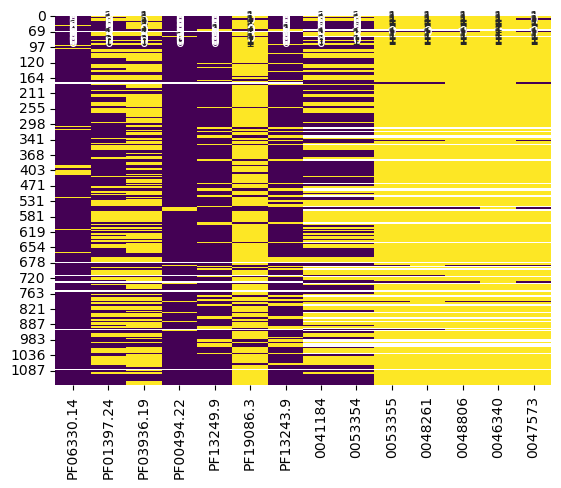

In [210]:
sns.heatmap(comp_df[comp_df['interesting']==True].drop(['interesting', 'most_unique_product_count'], axis=1), cmap='viridis', annot=True, cbar=False)

C:\Users\terca\anaconda3\envs\esm_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

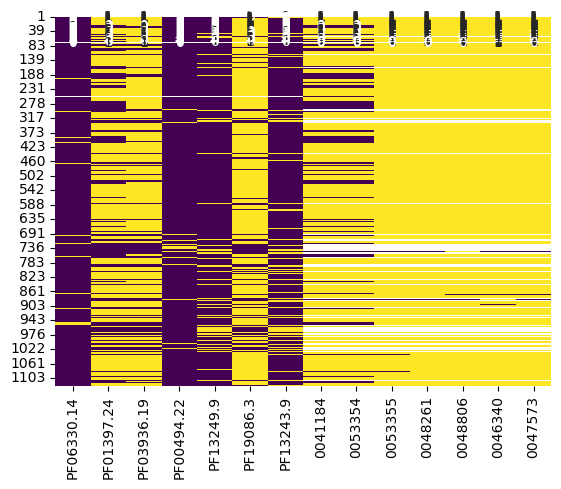

In [211]:
sns.heatmap(comp_df[comp_df['interesting']==False].drop(['interesting', 'most_unique_product_count'], axis=1), cmap='viridis', annot=True, cbar=False)